In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pathlib import Path
from docxtpl import  DocxTemplate
import datetime
from statistics import mean
import uuid
from datetime import datetime


In [2]:
envio = pd.read_csv('delivery_dataset.csv', sep=';')
envioReal = envio

In [3]:
# Eliminamos los datos nulos y los cambiamos.
lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Actual_Shipment_Time"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Actual_Shipment_Time"][i] = envioReal["Planned_Shipment_Time"][i]

lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Shipment_Delay"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Shipment_Delay"][i] = 0

lista_index=[]
lista_value=[]
for x, i in enumerate(envioReal["Delivery_Status"].isna()):
    if i == True:
        lista_index.append(x)
        lista_value.append(i)

for i in lista_index:
    envioReal["Delivery_Status"][i] = 1

C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\12972470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  envioReal["Actual_Shipment_Time"][i] = envioReal["Planned_Shipment_Time"][i]
C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\12972470.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  envioReal["Shipment_Delay"][i] = 0
C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\12972470.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [4]:
envioReal.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

In [5]:
total = envioReal.sum( axis = 1 )
counts = len( envioReal['Source'].value_counts() )
plt.show()

C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\3729444176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total = envioReal.sum( axis = 1 )


In [6]:
#DataFrame de envios para las cotizaciones

sources1 = envioReal[ envioReal['Source'] == 'LAS'  ]
sources2 = envioReal[ envioReal['Source'] == 'MDW'  ]
sources3 = envioReal[ envioReal['Source'] == 'PHX'  ]
sources4 = envioReal[ envioReal['Source'] == 'OAK'  ]
sources5 = envioReal[ envioReal['Source'] == 'HOU'  ]

sources = pd.concat( [ sources1, sources2, sources3, sources4, sources5 ] )

sources

dfSour = envioReal[envioReal['Source']=='LAX']

dfLAS = dfSour[dfSour['Destination']=='LAS']
dfMDW = dfSour[dfSour['Destination']=='MDW']
dfPHX = dfSour[dfSour['Destination']=='PHX']
dfOAK = dfSour[dfSour['Destination']=='OAK']
dfHOU = dfSour[dfSour['Destination']=='HOU']

dest = pd.concat([dfLAS, dfMDW, dfPHX, dfOAK, dfHOU])

destt=['Source', 'Destination', 'Carrier_Name', 'Planned_Delivery_Time', 'Distance']

envio=dest.loc[:,destt]

envio

Las = envio[ envio['Destination'] == 'LAS' ].mean()
Mdw = envio[ envio['Destination'] == 'MDW' ].mean()
Phx = envio[ envio['Destination'] == 'PHX' ].mean()
Oak = envio[ envio['Destination'] == 'OAK' ].mean()
Hou = envio[ envio['Destination'] == 'HOU' ].mean()

PLas =int(Las['Planned_Delivery_Time'].mean())
PMdw =int(Phx['Planned_Delivery_Time'].mean())
PPhx =int(Mdw['Planned_Delivery_Time'].mean())
POak =int(Oak['Planned_Delivery_Time'].mean())
PHou =int(Hou['Planned_Delivery_Time'].mean())
envio

enviofinal=pd.DataFrame({'Source': ['LAX', 'LAX', 'LAX', 'LAX', 'LAX'], 
           'Destination': ['LAS', 'MDW', 'PHX', 'OAK', 'HOU'],
           'Carrier_name': ['WN', 'WN', 'WN', 'WN', 'WN'],
           'Planned_Delivery_Time': [PLas, PMdw, PPhx, POak, PHou],
           'Distance': [236, 1750, 370, 337, 1390]},
            columns = ['Source', 'Destination', 'Carrier_name', 'Planned_Delivery_Time', 'Distance'])

enviofinal


C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\3932110821.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Las = envio[ envio['Destination'] == 'LAS' ].mean()
C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\3932110821.py:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mdw = envio[ envio['Destination'] == 'MDW' ].mean()
C:\Users\Theja\AppData\Local\Temp\ipykernel_8380\3932110821.py:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In additio

,Source,Destination,Carrier_name,Planned_Delivery_Time,Distance
0,LAX,LAS,WN,1538,236
1,LAX,MDW,WN,1562,1750
2,LAX,PHX,WN,1835,370
3,LAX,OAK,WN,1564,337
4,LAX,HOU,WN,1280,1390


In [7]:
def current_date_format(date):
    day = date.day
    month = date.month
    year = date.year
    messsage = "{}-{} del {}".format(day, month, year)

    return messsage

In [8]:
productos = pd.read_excel('productos.xlsx')
productos.set_index('product')
productosTienda = list(productos['product'])

def hacerPedido( nombre, cantidad, destino ):
    if nombre in productosTienda:
        productos.loc[ productos['product'] == nombre, 'stock' ] = productos.loc[ productos['product'] == nombre, 'stock' ] - 1
        productos.to_excel('productos.xlsx', engine='openpyxl', index=False)

productos


,product,price,unidades,stock,source
0,caja de mascarilla,12,50,2,LAS
1,caja de cloro,5,4,3,LAS
2,paquete de gel desinfectante,4,2,3,LAS
3,paquete de toallas humedas,6,12,5,LAS


In [9]:
hacerPedido( 'caja de cloro', '1', 'Lax' )

In [20]:
word_template_path ="template.docx"
#excel_path = "ejemplo1.xlsx"
            
            
datatext=["product","stock"]
dftext = productos.loc[:,datatext]
            
def crearCotizacion( nombre, producto, cantidad, destino, Carrier_name, Planned_Delivery_Time, Distance  ):
        myuuid = uuid.uuid1()
        dates = datetime.now()
        fecha = current_date_format(dates)
        
        precio = productos.loc[ productos['product'] == producto, 'price' ]    
        precio = precio[0]
        
        unidades = productos.loc[ productos['product'] == producto, 'unidades' ]
        unidades = unidades[0]

        source = productos.loc[ productos['product'] == producto, 'source' ]
        source = source[0]
                
                
        variables = {'product': producto, 
                     'cantidad': cantidad, 
                     'destino': destino, 
                     'fecha': fecha,
                     'precio': precio,
                     'unidades': unidades,
                     'source': source,
                     'carrier': Carrier_name,
                     'planned_delivey': Planned_Delivery_Time,
                     'distance': Distance,
                     'nombre': nombre
                     
                     }
        
        doc = DocxTemplate(word_template_path)
        doc.render( variables )
        doc.save( f"Cotizacion-{myuuid}.docx")


In [21]:
crearCotizacion('rigoberto', 'caja de mascarilla', 2, 'nosebro', 'WN', 2, 5)

<AxesSubplot: xlabel='Source', ylabel='Cantidad de sources'>

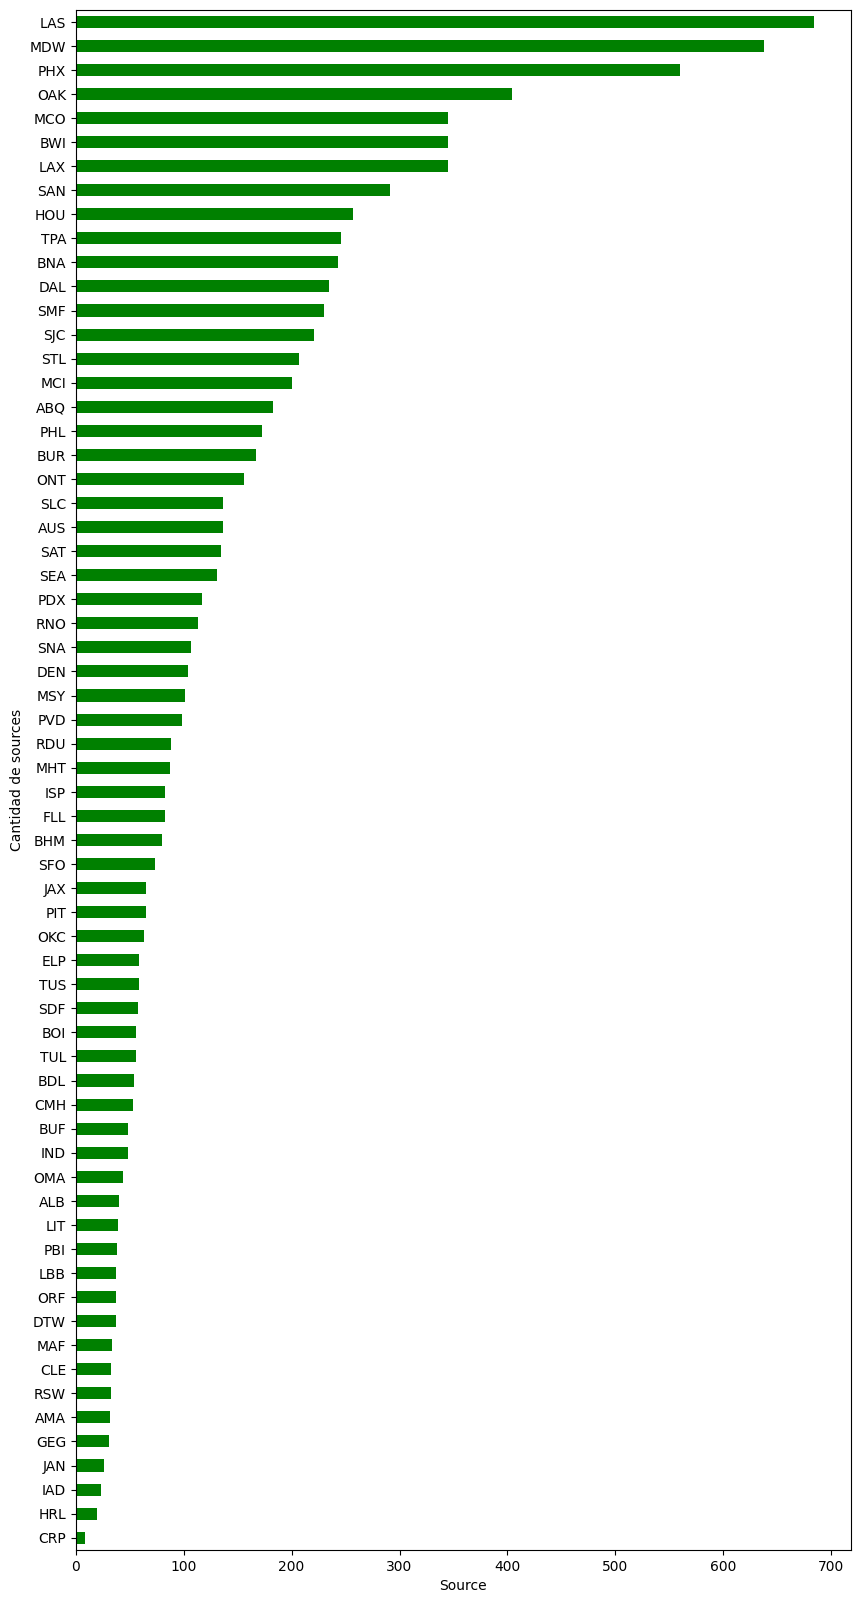

In [ ]:
envioReal['Source'].value_counts().sort_values().plot(kind='barh', color='g',xlabel='Source', ylabel='Cantidad de sources', figsize=[10,20],)

<AxesSubplot: xlabel='Source', ylabel='Cantidad de sources'>

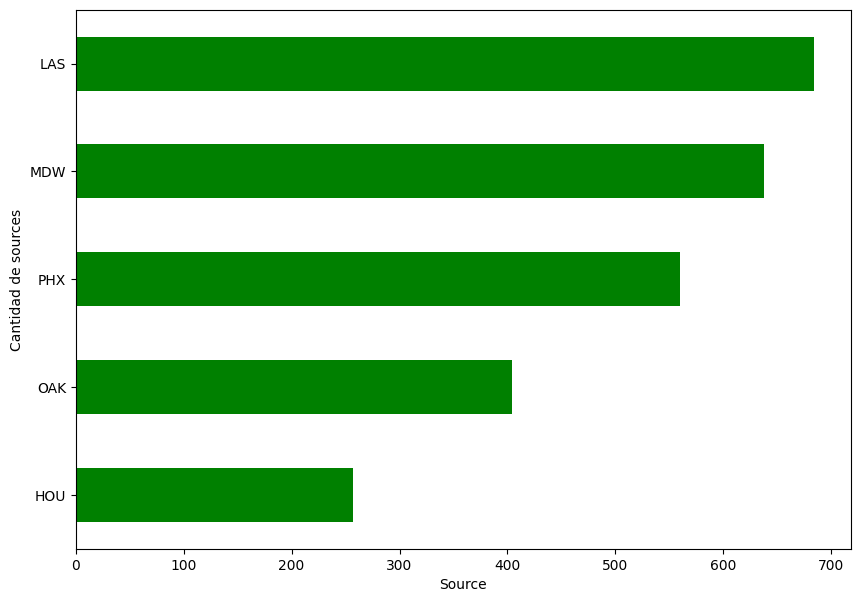

In [ ]:
sources['Source'].value_counts().sort_values().plot(kind='barh', color='g',xlabel='Source', ylabel='Cantidad de sources', figsize=[10,7],)

In [ ]:
dic = {}

for i in range( len(envioReal['Source']) ):
    x = 1
    word = envioReal.iloc[i]['Source'] 
    if( word not in dic ):
        print("hola")
        

hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola
hola


In [ ]:
dic

{}